#  Quasi-spherical Szekeres models and Generalized Relativistic Zel'dovich Approximation

**Created by: Ismael Delgado Gaspar 
 This research was funded by National Science Centre (NCN, Poland) under the Sonata-15 research grant UMO-2019/35/D/ST9/00342**

**Last update:** October 2, 2022

# Description: 

This notebook contains the code used to generate the figures shown in *Section Numerical Example* of the paper *Delgado Gaspar, Buchert and Ostrowski (2022)*. It intends to provide a pedagogical introduction to GRZA as a generalization of Szekeres models.

This notebook is organized as follows.

- **Section 1: Quasi-spherical Szekeres models in Hellaby's parametrization.** In this section, we introduced the Szekeres 'seed model' in Hellaby's parametrization setting up its free functions. This LTB-like parametrization is the most popular representation of the quasi-spherical models of class I. And our intuition (at least mine) works better here.

- **Section 2: GW parametrization.** The seed model is rewritten in the GW language.

- **Section 3: GRZA solutions.** We use the functions of the rescaled Szekeres model and perturb the initial data. The new solution can be interpreted as a generalization of the quasi-spherical Szekeres models, where the surfaces of $t,r=\hbox{const.}$ are 2-spheres but arranged in a more general way than in Szekeres.

- **Section 4: Estimation of the error via the Ham. constraint.** We exploit the relationship between the present models and the exact solutions to work out a closed-form expression for $\mathbb{H}:= \left(G_{\mu\nu}-8\pi T_{\mu\nu}\right) u^\mu u^\nu=  G_{00}-8\pi T_{00}$. Here, we evaluate the final expression.


# Section 1:  Quasi-spherical Szekeres models in Hellaby's parametrization

In this representation, the line-element is given by

$$ ds^2 =-dt^2 + \frac{\left(\Phi_{,r}-\Phi \mathcal{E}_{,r}/\mathcal{E}\right)^2}{\epsilon-K(r)} dr^2 +\frac{\Phi^2}{\mathcal{E}^2}\left(dp^2 + dq^2\right) \ , $$
with
$$
\mathcal{E}=\frac{S(r)}{2}\left(\left(\frac{p-P(r)}{S(r)}\right)^2 + \left(\frac{q-Q(r)}{S(r)}\right)^2+\epsilon\right) \ .
$$

In the equations above, $\Phi=\Phi(t,r)$, $\epsilon=1$ (for quasi-spherical models), and $k(r)$, $P(r)$, $Q(r)$ and $S(r)$ are arbitrary functions.

The function $\Phi$ obeys a Friedmann-like equation,
  
$$
\dot \Phi^2=-K(r)+\frac{2 M(r)}{\Phi}+\frac{1}{3}\Lambda \Phi^2 \ ,
$$

which can be integrated to give 

$$
t-t_{B}(r)=\int_0^\Phi \frac{d\tilde{\Phi}}{\sqrt{-K+2M/\tilde{\Phi}+\frac{1}{3}\Lambda \tilde{\Phi}^2}} \ .
$$

Here, $M(r)$ and $t_B(r)$ are arbitrary integration functions too, which can be identified as the effective gravitational mass  and the time of the initial singularity (the bang time).

*Note:* We are using natural units $G=c=1$.


## Dimensionless Initial Contitions

The initial data is specified at the last scattering time. First, we set the free parameters of the Friedmann-like reference model: $\hat{\varrho}_{b}(\mathbf{r})$ is taken equal to the value of the conventional FLRW universe at the initial time.
To work with dimensionless quantities, we take the Hubble parameter at the initial time ($H_\ast=H(t_{ls})$) as the time scale and $\ell=2\times 10^{-2}$ Mpc as the characteristic length of the inhomogeneous region. Next, we introduce the following parameters and functions,

\begin{equation}
\tau=H_{\ast} t \ , \quad \xi=\frac{z}{\ell} \ , \quad  \mu= \frac{4\pi}{3}\frac{\varrho}{H_{\ast}^2} \ , \quad \varkappa=\frac{k}{H_{\ast}^2} \ , \quad \lambda=\frac{\Lambda}{3 H_{\ast}^2} \ .
\end{equation}

In these variables, $\mu_{bi}$ denotes the density value of the equivalent FLRW model at the initial time, and the remaining arbitrary free function of the Friedmann-like reference model is given by

$$
\varkappa(\xi)=\hat{\varkappa}(\xi) \xi^2 \ ,
\quad \hat{\varkappa}(\xi)=\varkappa_1+\varkappa_2 \left(1+\tanh 4\left(\xi-1/2\right) \right) \ ,
$$

with $\varkappa_1=10^{-5}$ and $\varkappa_2=37\times 10^{-5}$. For our analysis, we consider these functions in the interval $0 \le\xi\le 1$, $-\infty< x,y <+\infty$. In this model, $\xi$ should be interpreted as a radial comoving coordinate, while $x$ and $y$ are the angular coordinates.

In the model presented here, we will consider:

$$ \Phi(r,\tau_{ini})=\xi, \quad \mu:=\mu_b=\frac{4\pi}{3}\frac{\varrho_b(\tau_{ini})}{H_{\ast}^2} \ .$$

—at the last scattering time: $t = t_{ls}$ and $t_{ls}\approx 4\times10^5$ years. 

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from scipy import integrate
from scipy.integrate import odeint
from scipy.optimize import fsolve
import scipy.interpolate
from scipy.interpolate import UnivariateSpline

## Some general functions

In [2]:
#df(r)/dr as the derivative of the spline obtained from (r_arr, f_arr)
def SplinesDer(r_arr, f_arr):
    fspl = UnivariateSpline(r_arr, f_arr, k=4, s=0)
    dfspl=fspl.derivative(n=1)
    return dfspl

## Constants

In [3]:
eps  = 1.0           #(quasi-spherical models)
mub  = 0.5           #mu_b
tini = 0.0           #initial time
t0   = 22000.0       #present cosmic time
lamb = 1.2986*1e-9   #adimensional cosmological constant
ls   = 2e-2          #scale in Mpc r->r*ls [Mpc]
r0 = 0               #Mesh: radial partition: r=[r0,rf].
rf = 1

## Mass 

In [4]:
# Mass function
def M(r):
    return mub*(r**3)

# Derivative of the mass function
def dM(r):
    return 3*mub*(r**2)

## k(r) 

In [5]:
# Some constants
k1   = 5e-5         
k2   = 39e-5
sig1 = 1/8
sig2 = 1/2

#As in the paper k=r^2*\kappa
# kappa
def kappa(r):
    return k1+k2*(1+np.tanh(4*(r-0.5)))

def k(r):
    return (r**2)*kappa(r)

#derivative of kappa
def dkappa(r):
    Sechx=1/np.cosh(4*(r-0.5))
    return 4*k2*(Sechx**2)

#derivative of k
def dk(r):
    return 2*r*kappa(r)+(r**2)*dkappa(r)

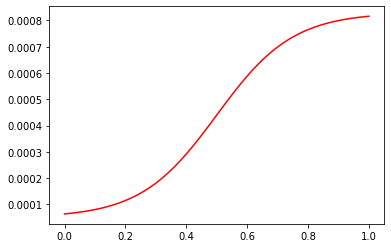

In [6]:
#kappa vs r
nr = 50; rv_arr = np.linspace(r0, rf, nr+1)  # evenly spaced radial partition
kappav_arr=kappa(rv_arr)
fig, ax = plt.subplots()
ax.plot(rv_arr,kappav_arr,color='r')
plt.show()
del kappav_arr, rv_arr, fig, ax

## Szekeres dipole

<p> Three out of the five Szekeres'unknown functions are related to the Szekeres dipole: $P(r)$, $Q(r)$, $S(r)$. However, in this parametrization, the physically important quantities are their gradients: $P_{,r}$, $Q_{,r}$ and $S_{,r}$: </p>

$$\kappa \varrho=\frac{2\left(M_{,r}-3M \mathcal{E}_{,r}/\mathcal{E}\right)}{\Phi^2\left(\Phi_{,r}-\Phi \mathcal{E}_{,r}/\mathcal{E}\right)}$$

<p> If $P(r),Q(r), S(r)=$const, then neither $\varrho$ nor the evolution equation for $\Phi$ depend on them, and the model becomes the LTB model.</p>

See *K. Bolejko. "Structure formation in the quasispherical Szekeres model." Physical Review D (2006)*

Here, we take $S=1$, so all the structures (extrema of the density) lie in the equatorial plane.

$$
\mathcal{E}=\frac{S}{2}\left(\left(\frac{p-P}{S}\right)^2 + \left(\frac{q-Q}{S}\right)^2+\epsilon\right) \ .
$$

*R. Sussman and I. Delgado Gaspar Physical Review D (2015)*

Also, the functions $Q$ and $P$ are defined as cubic polynomials. This makes it easier to build the dipole as a piecewise function with continuous derivatives (zero at the matching spheres). 

## Polynomial coefficients

$$\mathcal{P}(r)=c_0+c_1 r +c_2 r^2 +c_3 r^3
\\
\mathcal{P}(r_0)=q_0 \ , \quad \mathcal{P}(r_f)=P_0 \ , \quad \mathcal{P}^\prime(r_0)=\mathcal{P}^\prime(r_f)=0$$

In [7]:
# c0,c1,c2 and c3 for a polinomial function satisfying:
#Pol(r1)=q0 and Pol(r2)=Q0 
#and Pol'(r1)=Pol'(r2)=0

def Coeff(r1,r2,q0,Q0):
    c0=-(-Q0*(r1**3) + 3*Q0*(r1**2)*r2 - 3*q0*r1*(r2**2) + q0*(r2**3))/((r1-r2)**3)
    c1=-(6*(q0-Q0)*r1*r2)/((r1-r2)**3)
    c2=(3*(q0 - Q0)*(r1+r2))/((r1-r2)**3)
    c3=-(2*(q0-Q0))/((r1-r2)**3)
    return [c0,c1,c2,c3]

def Pol(r,polcoeff):
    pol = polcoeff[0] + polcoeff[1]*r + polcoeff[2]*(r**2)+ polcoeff[3]*(r**3)
    return pol

def DPol(r,polcoeff):
    dpol = polcoeff[1] + 2*polcoeff[2]*r + 3*polcoeff[3]*(r**2)
    return dpol

We explicitly assume that $S\equiv1$

In [8]:
p01=0.0
P01 = -6e-1
polcoeff=Coeff(r0,rf,p01,P01)

#Piecewise functions
def P(r):
    if 0<=r<=rf:
        Pv=Pol(r,polcoeff)
    else:
        Pv=0
    return Pv

def Q(r):
    return 0


def dP(r):
    if 0<=r<=rf:
        dPv=DPol(r,polcoeff)
    else:
        dPv=0
    return dPv

def dQ(r):
    return 0

Dipole functions:
$$
\mathcal{E}=\frac{S}{2}\left(\left(\frac{p-P}{S}\right)^2 + \left(\frac{q-Q}{S}\right)^2+\epsilon\right) \ .
$$
and $\mathcal{E}_{,r}$ taking $S=1$.

In [9]:
def E(r,x,y):
    return (1/2)*((x-P(r))**2+(y-Q(r))**2+eps)

def dE(r,x,y): # Using S=1!!!!
    return -(x-P(r))*dP(r)-(y-Q(r))*dQ(r)

## Stereographic projection

We use a stereographic projection to transform the angular variables $p$ and $q$ into the angular variables of a sphere. Since $S=1$, we have:

$$
x-P=\cot\left(\frac{\theta}{2}\right)\cos (\phi) \ , 
\quad 
y-Q=\cot\left(\frac{\theta}{2}\right)\sin (\phi) \ .
$$

In [10]:
def CotF(x):
    return 1/np.tan(x)

def Xcoor(r,phi,theta):
    return P(r)+np.cos(phi)*CotF(theta/2)

def Ycoor(r,phi,theta):
    return Q(r)+np.sin(phi)*CotF(theta/2)

# Section 2: GW parametrization

In our case, $k=r^2 \kappa(r)\;$, 
$$
f=\sqrt{k}=\sqrt{\kappa} r \ , \;
\Phi_{ini}=r \ ,\; M=\mu_b r^3 
\quad
\implies
\quad
\mathcal{S}_{ini}=\frac{1}{\sqrt{\kappa}} \quad
\land
\quad
\hat{\mu}= \frac{\mu_b}{\kappa^{3/2}}
$$

In [11]:
def f(r):
    return np.sqrt(k(r))

def df(r):
    sqka=np.sqrt(kappa(r))
    Dka=dkappa(r)
    return sqka + r*Dka/(2*sqka)

def fa(r):
    return np.sqrt(kappa(r))

def Sini(r):
    return 1/np.sqrt(kappa(r))

def muGW(r):
    return mub/(fa(r)**3)   #mu/(k_aux)**(3/2)

def dmuGW(r):
    Ka=kappa(r)
    Dka=dkappa(r)
    return -(3*mub*Dka)/(2*Ka**(5/2)) 

def Wmf(r):
    return np.sqrt(1-k(r))

## Definition $\beta_+$

 $\beta_+=-f\frac{k_0 \hat{\mu}_{,r}}{3 \hat{\mu}}$

In [12]:
def betaP(r): 
    fv=f(r)
    mu=muGW(r)
    dmu=dmuGW(r)
    return -fv*dmu/(3*mu)

## Definition of $\beta_+$

$\beta_-=f \, t_{B}^\prime$

In [ ]:
#Integrand.  m is a parameter parameter of the integral.
def FriedGW_int(s,mu):
    return 1/np.sqrt(-1+2*mu/s+(lamb)*s**2);

#Integrate S=0 to S=S_{ini}.
def inttBGW(r):
    sini=Sini(r)
    mu=muGW(r)
    #intet,err=integrate.quad(fintK, r0, rv, args=(mvar,kc,))
    intet=integrate.quad(FriedGW_int, 0, sini, args=(mu,))[0]
    return -intet

nr = 100; rv_arr = np.linspace(r0, rf, nr+1)  # evenly spaced radial partition
tBGW_arr=[inttBGW(r) for r in rv_arr]
dtB=SplinesDer(rv_arr, tBGW_arr)

del nr, tBGW_arr, rv_arr, FriedGW_int, inttBGW

In [ ]:
def betaM(r):
    return f(r)*dtB(r)

## Definition of $\mathcal{A}$

$$
C_0(r)=\frac{1}{2\mathcal{S}}
 \ , \quad C_1(r)=-\frac{P}{2\mathcal{S}} \ , 
\quad  C_2(r)=-\frac{Q}{2\mathcal{S}} \ , 
\quad
C_3(r)=\frac{P^2+Q^2+\epsilon\, \mathcal{S}^2}{2\mathcal{S}} \ .
$$

Then, $e^\nu =\frac{f}{\mathcal{E}}$ and $ f \nu_{,r} = f_{,r}-f\frac{\mathcal{E}_{,r}}{\mathcal{E}}$

 $$\mathcal{A} = f \nu_{,r} -k_0 \beta_+= f_{,r}-f\frac{\mathcal{E}_{,r}}{\mathcal{E}}  -k_0 \beta_+$$

In [13]:
def Axy(r,x,y):
    fv=f(r)
    dfv=df(r)
    Ev=E(r,x,y)
    dEv=dE(r,x,y)
    bp =betaP(r)
    return dfv-fv*dEv/Ev-bp

def etonu(r,x,y):
    return f(r)/E(r,x,y)

## Initial condition of the decaying solution ($f_-$) 

 $f_-=\frac{\dot{\mathcal{S}}}{\mathcal{S}}$

At $t=t_{ini}=0$: $\mathcal{S}_{ini}=\frac{1}{\sqrt{k_{aux}}}$ 
and 
$
\dot{\mathcal{S}}_{ini}=\left(-k_0 + \frac{2 \mu}{\mathcal{S}_{ini}} +\frac{\Lambda}{3}\mathcal{S}^2_{ini}\right)^{1/2}
$

In [16]:
def dotSini_func(r):
    mu=muGW(r)
    Si=Sini(r)
    return np.sqrt(-1+2*mu/Si+lamb*(Si**2)) # We're assuming k>0, 
                                                # then k0=1

def fm_func(r):
    dotSi=dotSini_func(r)
    Si=Sini(r)
    return dotSi/Si

## Initial condition of the growing solution ($f_+$) 

$f_+=\frac{\dot{\mathcal{S}}}{\mathcal{S}}\int_0^{\mathcal{S}_{ini}}\frac{d\hat{\mathcal{S}}}{\dot{(\hat{\mathcal{S}}})^3}$

At $t=t_{ini}=0$: $\mathcal{S}_{ini}=\frac{1}{\sqrt{k_{aux}}}  \quad \mbox{and} \quad
\dot{\mathcal{S}}=\left(-k_0 + \frac{2 \mu}{\mathcal{S}} +\lambda\mathcal{S}^2\right)^{1/2}
$

In [17]:
#Integrand. kval=k(r)and m=M(r), parameters of the integral.
def intdSto3(s,mu):
    ds=np.sqrt(-1+2*mu/s+lamb*(s**2)) #k0=1
    return 1/ds**3 

#Integrate Phi=0 to Phi=r.
def intGrowMod(r):
    mu=muGW(r)
    #intet,err=integrate.quad(fintK, r0, rv, args=(mvar,kc,))
    intet=integrate.quad(intdSto3, 0, Sini(r), args=(mu,))[0]
    return intet


def fp_func(r):
    intev=intGrowMod(r)
    fmv=fm_func(r)
    return fmv*intev

## Initial condition for the time derivative of the growing decaying solutions ($\dot{f}_\pm$) 

$$
 \dot{f}_+(t_{\tiny{\mbox{ini}}}) =\frac{1}{\mathcal{S}_{\tiny{\mbox{ini}}}\dot{\mathcal{S}}_{\tiny{\mbox{ini}}}}\left(1 +\left(k_0-\frac{3\mu}{\mathcal{S}_{\tiny{\mbox{ini}}}}\right) f_+(t_{\tiny{\mbox{ini}}})\right) \ ;
\qquad
 \dot{f}_- (t_{\tiny{\mbox{ini}}})= \frac{1}{\mathcal{S}_{\tiny{\mbox{ini}}}\dot{\mathcal{S}}_{\tiny{\mbox{ini}}}}\left(k_0-\frac{3\mu}{\mathcal{S}_{\tiny{\mbox{ini}}}}\right)\, f_-(t_{\tiny{\mbox{ini}}}) \ .
$$

In [18]:
def dotfPini_func(r):
    mu=muGW(r)
    Si=Sini(r)
    dSi=dotSini_func(r)
    fpini=fp_func(r)
    return (1/(Si*dSi))*(1+(1-3*mu/Si)*fpini)

def dotfMini_func(r):
    mu=muGW(r)
    Si=Sini(r)
    dSi=dotSini_func(r)
    fmini=fm_func(r)
    return (1/(Si*dSi))*(1-3*mu/Si)*fmini

## Integration of EE's equations

$$
\dot{\mathcal{S}}=\sqrt{-k_0 + \frac{2 \mu}{\mathcal{S}} +\frac{\Lambda}{3}\mathcal{S}^2}
\\
\ddot{f}_\pm + 2\frac{\dot{\mathcal{S}}}{\mathcal{S}}\dot{f}_\pm-\frac{3\mu}{\mathcal{S}^3} f_\pm=0
$$

In [19]:
def EEsGW(var_arr,t,r):
    s =var_arr[0]
    fp=var_arr[1]
    dfp=var_arr[2]
    fm=var_arr[3]
    dfm=var_arr[4]
    mu=muGW(r)
    ds=np.sqrt(-1+2*mu/s+(lamb)*(s**2)) 
    d2fp=-2*(ds/s)*dfp+(3*mu/s**3)*fp
    d2fm=-2*(ds/s)*dfm+(3*mu/s**3)*fm
    dvar_arr=[ds,dfp,d2fp,dfm,d2fm]
    return dvar_arr


def SolEEGW(r,t):
    Si=Sini(r)
    fpini=fp_func(r)
    dfpini=dotfPini_func(r)
    fmini=fm_func(r)
    dfmini=dotfMini_func(r)
    tarr=np.linspace(tini,t,5)
    ICs_arr=[Si,fpini,dfpini,fmini,dfmini]
    sol=odeint(EEsGW,ICs_arr,tarr,args=(r,))
    SolS=sol[-1,0];Solfp=sol[-1,1];Soldfp=sol[-1,2];Solfm=sol[-1,3];Soldfm=sol[-1,4]
    return [SolS,Solfp,Soldfp,Solfm,Soldfm]

## Some plots

In [20]:
#Return \delta \rho (t) along the ray phi=const, theta =pi/2
def rhoGWRPhi(t,phi,nr,rhobt0):
    theta=np.pi/2
    R_arr=[]
    dc_arr=[]
    r_arr=np.linspace(r0, rf, nr+1)
    for r in r_arr:
        mu=muGW(r)
        sol=SolEEGW(r,t)
        s=sol[0]
        bp=betaP(r)
        bm=betaM(r)
        fp=sol[1]
        fm=sol[3]
        F=bp*fp+bm*fm
        rhoAux=(mu/s**3)
        #
        xv=Xcoor(r,phi,theta)
        yv=Ycoor(r,phi,theta)
        A=Axy(r,xv,yv)
        #
        rho=6*rhoAux*(1+F/(A-F))
        dc=rho/rhobt0-1
        Phi=s*f(r)*ls
        R_arr.append(Phi)
        dc_arr.append(dc)
    return R_arr, dc_arr

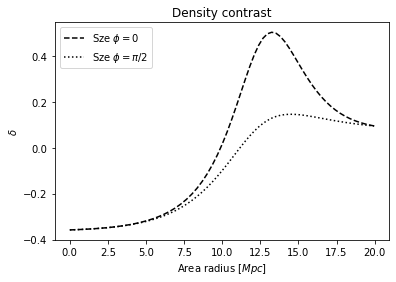

In [21]:
rhobt0=2.83487774323234e-09
nr=60 
phi1=0; phi2=np.pi/2;

PhiGWv_arr   = rhoGWRPhi(t0,phi1,nr,rhobt0)[0]
dcGWPhi0_arr = rhoGWRPhi(t0,phi1,nr,rhobt0)[1]
dcGWPhipi2_arr = rhoGWRPhi(t0,phi2,nr,rhobt0)[1]

fig,ax=plt.subplots()
plt.plot(PhiGWv_arr, dcGWPhi0_arr, 'k--', color='black', 
         label='Sze $\phi=0$')
plt.plot(PhiGWv_arr, dcGWPhipi2_arr, 'k:', color='black', 
         label='Sze $\phi=\pi/2$')

ax.set(xlabel="Area radius $[Mpc]$",
       ylabel="$\delta$",title="Density contrast")

plt.legend()
plt.show()

del rhobt0, nr, phi1, phi2, PhiGWv_arr, dcGWPhi0_arr, dcGWPhipi2_arr, fig, ax

# Section 3: Generalized RZA


The Gram's matrix (initial metric) is taken as
$$
G_{ij}=
\mbox{Diag}\left[\left(\mathcal{A}-\hat{\mathcal{F}}_{ini}\right)^2\left(\frac{\mathcal{W}} {\chi}\right)^2 ,
\left(\frac{e^\nu}{\chi}\right)^2  ,
\left(\frac{e^\nu}{\chi}\right)^2\right]= 
\mbox{Diag}\left[\left(\mathcal{A}-\hat{\mathcal{F}}_{ini}\right)^2\left(\frac{\mathcal{W}} {\chi}\right)^2 ,
\left(\frac{r}{\mathcal{E}}\right)^2  ,
\left(\frac{r}{\mathcal{E}}\right)^2\right]
$$
where the metric functions $e^\nu$, $\mathcal{A}$ and $\mathcal{W}$ are chosen as in Szekeres models with $S(\xi)=1$, $Q(\xi)=0$ and $P(\xi)$ is a third order polynomial function satisfying $P(0)=P^\prime(0)=P^\prime(\xi_1)=0$ and $P(\xi_1)=-0.6$. Moreover,  $\hat{\mathcal{F}}_{ini}$ is the initial value of the function 
\begin{equation}\label{Eq:FapproxID}
\hat{\mathcal{F}}=\mathcal{F}+\delta \mathcal{F} \ ,\quad \delta \mathcal{F}=\delta \beta_+ f_+ + \delta \beta_- f_-  \ .
\end{equation}
Here, $\mathcal{F}=\beta_+ f_+ + \beta_- f_-$ is the Szekeres function, and  
 $\delta\beta_\pm(\mathbf{r})$ are arbitrary functions of the spatial coordinates, $\mathbf{r}=\left(\xi,x,y\right)$. In this simulation, we take
$$
\delta \beta_+(\mathbf{r})=\alpha \sin^3(\gamma \pi y) \sin^4(\pi \xi) \ ,
$$
with $\gamma=3$, and vary $\alpha$. Also, in order to have a model where the voids compensate for the mass excess in the overdensities (i.e., a mass-compensated array of structures), $\delta\beta_-(\mathbf{r})$ satisfies
$$
\delta\beta_-(\mathbf{r})=-\frac{\delta\beta_+ f_+(t_{ini},\xi)}{f_-(t_{ini},\xi)} \ .
$$
%
Then, the initial energy density is set to
$$
\varrho_{ini}=\varrho_b(t_{ini})\left(\frac{\mathcal{A}}{\mathcal{A}-\hat{\mathcal{F}}_{ini}}\right) \ ,
$$
which determines the generalized Newtonian acceleration,
$$
W=-4\pi\frac{\hat{\mathcal{F}}_{ini}}{\mathcal{A}-\hat{\mathcal{F}}_{ini}}  \ .
$$
The whole set is close by the initial values of the deformation, $P(t_{ini})=0$, and the generalized Newtonian velocity,
\begin{equation}
U=-\frac{\dot{\hat{\mathcal{F}}}_{ini}}{\mathcal{A}-\hat{\mathcal{F}}_{ini}} \ .
\end{equation}


In [22]:
def Chi(r):
    return np.sqrt(kappa(r))

def Aini(r):
    return 1

def dAini(r):
    return np.sqrt(-kappa(r)+2*mub/Aini(r)+lamb*Aini(r)**2)

#fMi
def fMiGZ(r):
    return fm_func(r)

def bmGZ(r):
    return betaM(r)

def bpGZ(r):
    return betaP(r)


#Integrand. kval=k(r)and m=M(r), parameters of the integral.
def intdAto3(Av,kv):
    ds=np.sqrt(-kv+2*mub/Av+lamb*(Av**2)) #k0=1
    return 1/ds**3 

#Integrate Phi=0 to Phi=r.
def intGrowModA(r):
    kv=kappa(r)
    #intet,err=integrate.quad(fintK, r0, rv, args=(mvar,kc,))
    intet=integrate.quad(intdAto3, 0, Aini(r), args=(kv,))[0]
    Chiv=Chi(r)
    return (Chiv**3)*intet #### chi**3

def fPiGZ(r):
    return fMiGZ(r)*intGrowModA(r)

def dotfPiGZ(r):
    Chiv=Chi(r)
    ai=Aini(r)
    dai=dAini(r)
    return (1/(ai*dai))*(Chiv**2+(kappa(r)-3*mub/ai)*fPiGZ(r))

def dotfMiGZ(r):
    ai=Aini(r)
    dai=dAini(r)
    return (1/(ai*dai))*(kappa(r)-3*mub/ai)*fMiGZ(r)

## Perturbation ($\delta \beta_\pm$)

In [23]:
gamma = 3

def dbetap(r, x, y, alpha):
    pi=np.pi
    sinv1=np.sin(gamma*pi*y)
    sinv2=np.sin(pi*r)
    return alpha*(sinv1**3)*(sinv2**4)

def dbetam(r, x, y, alpha):
    fmi=bmGZ(r)
    if fmi!=0:
        fpi=fPiGZ(r)
        deltaBp=dbetap(r, x, y, alpha)
        dbm=-deltaBp*fpi/fmi
    else:
        dbm=0
    return dbm

## Background curvature at $t=t_{ini}$

The Volume element is given by:
$$ d^3 V_D=\sqrt{G} J d^3 \mathbf{x}= \sqrt{G} A^3 (1+P) d^3 \mathbf{x} $$
\begin{equation}
G_{ij}=
\mbox{Diag}\left[\left(\mathcal{A}-\hat{\mathcal{F}}_{ini}\right)^2\left(\frac{\mathcal{W}} {\chi}\right)^2 ,
\left(\frac{r}{\mathcal{E}}\right)^2  ,
\left(\frac{r}{\mathcal{E}}\right)^2\right]  \Rightarrow \sqrt{G}
=\frac{\left(\mathcal{A}-\hat{\mathcal{F}}_{ini}\right) r^{2} \mathcal{W}}{\chi \mathcal{E}^2}
\end{equation}

From the Hamiltonian constraint and the relation of the Szekeres functions:
$$
\mathcal{R}=6\frac{\kappa}{A^2}-\frac{4}{\mathcal{J}}\left(H \dot{P} + \frac{3\mu_{b} }{A^{3} }P +\frac{\mathcal{W}}{A^{3}}\right)  
$$

In [24]:
#Functions R_{ini}, dV_{ini} and R_{ini}*dV_{ini} (used below as the integrand )
def R3iniHam(r,x,y,alpha):
    kv=kappa(r)
    bpi=bpGZ(r)
    bmi=bmGZ(r)
    fpi=fPiGZ(r)
    fmi=fMiGZ(r)
    dfpi=dotfPiGZ(r)
    dfmi=dotfMiGZ(r)
    FSzi=bpi*fpi+bmi*fmi
    dFSzi=bpi*dfpi+bmi*dfmi
    AiSz=Axy(r,x,y)
    #Perturbation
    deltaBp=dbetap(r, x, y, alpha)
    deltaBm=dbetam(r, x, y, alpha)      
    Fi=FSzi+deltaBp*fpi+deltaBm*fmi
    dFi=dFSzi+deltaBp*dfpi+deltaBm*dfmi
    Ai=AiSz-deltaBp
    #ICs
    Pi=0
    dPi=-dFi/(Ai-Fi)
    ai=Aini(r)
    Hi=dAini(r)/Aini(r)
    Wv=- 3*mub*(Fi/(Ai-Fi))
    r3=6*kappa(r)/ai**2-(4/(1+Pi))*(Hi*dPi+3*(mub/ai**3)*Pi+Wv/ai**3)
    return r3

def dVDini(r,x,y,alpha):
    bpi=bpGZ(r)
    bmi=bmGZ(r)
    fpi=fPiGZ(r)
    fmi=fMiGZ(r)
    FSzi=bpi*fpi+bmi*fmi
    AiSz=Axy(r,x,y)
    Chiv=Chi(r)
    #Perturbation
    deltaBp=dbetap(r, x, y, alpha)
    deltaBm=dbetam(r, x, y, alpha)       
    Fi=FSzi+deltaBp*fpi+deltaBm*fmi
    Ai=AiSz-deltaBp
    Ev=E(r,x,y)
    Wmi=Wmf(r)
    dv=(Ai-Fi)*Wmi*(r**2)/(Chiv*Ev**2)
    return dv

def dvdr3ini(r, x, y, alpha):
    dvi=dVDini(r, x, y, alpha)
    r3i=R3iniHam(r, x, y, alpha)
    return dvi*r3i

 Then, 
 $$k_B=\frac{\langle\mathcal{R}\rangle_D(t_i)}{6}$$
 $$V_D(t_i)=\int_{D_i} \sqrt{G}d^3\mathbf{x} \ , \quad
I_1(t_i)=\int_{D_i} \mathcal{R}(t_i) \sqrt{G}d^3\mathbf{x}\ ,\quad 
\langle\mathcal{R}\rangle_D(t_i)=\frac{1}{V_{Di}}\int_{D_i} \mathcal{R}(t_i) \sqrt{G}d^3\mathbf{x}$$

In [25]:
def kbV_Dini(alpha,err):
    intvINI=integrate.tplquad(dVDini,\
                       -np.inf, np.inf,                              # y limits
                       lambda y: -np.inf, lambda y: np.inf,          # x limits
                       lambda y,x: r0, lambda y,x: rf, \
                       epsabs=err, epsrel=err,args=(alpha,))         # r limits
    VDi=intvINI[0]
    # integral I_1(t_i)
    intvr3INI=integrate.tplquad(dvdr3ini,\
                       -np.inf, np.inf,                              # y limits
                       lambda y: -np.inf, lambda y: np.inf,          # x limits
                       lambda y,x: r0, lambda y,x: rf, \
                       epsabs=err, epsrel=err,args=(alpha,))         # r limits
    I1i=intvr3INI[0]
    #K_B
    kB=intvr3INI[0]/(6*intvINI[0])
    return kB, VDi

## Solving master trace evolution equation + Friedmann-like one

In [26]:
def EEsGZA(var_arr,t,kv,Wv):
    a  = var_arr[0]
    P  = var_arr[1]
    dP = var_arr[2]
    da = np.sqrt(-kv+2*mub/a+(lamb)*(a**2))
    d2P= -2*(da/a)*dP+(3*mub/a**3)*P+Wv/a**3
    dvar_arr=[da,dP,d2P]
    return dvar_arr

## Initial conditions WL $(r,x,y)$: $[A(t_{ini}), P(t_{ini}), \dot{P}(t_{ini})]$

In [27]:
def ICsWL(r,x,y,alpha):
    ai=Aini(r)
    kv=kappa(r)
    bpi=bpGZ(r)
    bmi=bmGZ(r)
    fpi=fPiGZ(r)
    fmi=fMiGZ(r)
    dfpi=dotfPiGZ(r)
    dfmi=dotfMiGZ(r)
    FSzi=bpi*fpi+bmi*fmi
    dFSzi=bpi*dfpi+bmi*dfmi
    AiSz=Axy(r,x,y)
    #Perturbation
    deltaBp=dbetap(r, x, y, alpha)
    deltaBm=dbetam(r, x, y, alpha)       # to compensate 
    Fi=FSzi+deltaBp*fpi+deltaBm*fmi
    dFi=dFSzi+deltaBp*dfpi+deltaBm*dfmi
    Ai=AiSz-deltaBp
    #ICs
    Pi=0
    dPi=-dFi/(Ai-Fi)
    Wv=- 3*mub*(Fi/(Ai-Fi)) #4 pi rho= 3 mub
    #
    ICs=[ai,Pi,dPi]
    return [ICs,kv,Wv]

## Solution at $t=teval$ for WL $(r,x,y)$: $[A, P, \dot{P}]$

In [28]:
def GRZASolWL(teval, r, x, y, alpha):
    IiniCond=ICsWL(r, x, y, alpha)
    ICsA_arr=IiniCond[0]
    kv=IiniCond[1]
    Wv=IiniCond[2]
    t_arr= np.linspace(tini,teval,10)
    sol=odeint(EEsGZA,ICsA_arr,t_arr,args=(kv,Wv,))
    #        A        P            dP
    return [sol[-1,0],sol[-1,1],sol[-1,2]]

## Background Evolution

In [29]:
def dadt(a, t, kB):
    Dadt = np.sqrt(-kB+2*mub/a+lamb*(a**2))
    return Dadt

def rhobt(t, kB):
    aini=1.0
    tarr  = np.linspace(tini,t,2)
    a0 = odeint(dadt,aini,tarr,args=(kB,))[-1,0] #array of \Phi(t0,ri) values
    return 6*mub/(a0**3) # 8 pi rho_b recall mub=(4 pi/3) rho/H^2

## Density contrast 
$$8 \pi \varrho_{ini}/H_\ast^2=6 \mu_{ini}$$

In [30]:
def RhoIni(r, x, y, alpha): # 8 \pi \varrho_{ini}
        #Szekeres functions fr the initial density
        ASz=Axy(r, x, y)
        bp=betaP(r)
        bm=betaM(r)
        fp=fPiGZ(r)
        fm=fMiGZ(r)       
        FSz=bp*fp+bm*fm
        #Perturbation
        deltaBp=dbetap(r, x, y, alpha)
        deltaBm=dbetam(r, x, y, alpha) 
        F=FSz+deltaBp*fp+deltaBm*fm
        A=ASz-deltaBp
        #initial density
        rhoi=6*mub*(A/(A-F)) #kappa * rhoi
        return rhoi

## Density contrast in the equatorial plane

In [31]:
#it exports (x, y, delta) at  t.
#file: 'str1'-XYRho.txt
#below we use str1 to se

def deltaRhoXY(t, nr, nphi, alpha, str1):
    #background
    err=1e-2; kB=kbV_Dini(alpha, err)[0]
    rhob=rhobt(t, kB)
    #arrays
    theta=np.pi/2
    XYRho_arr=[]
    r_arr=np.linspace(r0, rf, nr+1)
    phif=2*np.pi*(1-1/nphi)
    phi_arr=np.linspace(0, phif, nphi+1)
    for r in r_arr:
        for phi in phi_arr:   
            #
            x=Xcoor(r,phi,theta)
            y=Ycoor(r,phi,theta)
            #
            sol=GRZASolWL(t, r, x, y, alpha)
            av=sol[0]; Pv=sol[1];
            #initial density
            rhoi=RhoIni(r, x, y, alpha)
            #final density: jacobian
            Jv=(av**3)*(1+Pv)
            #we're computing kappa*\rho
            rhov=rhoi/Jv # 8 pi \rho
            #density contrast
            dc=rhov/rhob-1
            Rv=av*ls*r; Xpv=Rv*np.cos(phi); Ypv=Rv*np.sin(phi);
            #append
            XYRho_arr.append([Xpv,Ypv,dc]) 
    #export
    stringn  =  str(str1).zfill(2)
    filename = "%s-XYRhoC2.txt" % stringn
    np.savetxt(filename, XYRho_arr, delimiter=' ')
    return None

In [32]:
nr=70;  nphi=70;
alp0=0; alpf=0.0048; nalp=6; 
alp_arr=np.linspace(alp0, alpf, nalp)

In [33]:
%%script false --no-raise-error #This prevent the cell from being executed
#
str1=0
for alp in alp_arr:
    deltaRhoXY(t0, nr, nphi, alp, str1)
    str1+=1 
    print(str1)

# Section 4: Estimation of the violation of the Hamiltonian constraint

$$
\mathbb{H}(\mathbf{r},t):=
\frac{2}{A^2 r^2 \mathcal{W}^2}
\bigg[
-\frac{1}{2}\left(1+\frac{\mathcal{G}}{\hat{\mathcal{G}}}\right)
-\frac{1}{\hat{\mathcal{G}}} f \nu_{,r}
+\epsilon f_{,r}
+\frac{f \mathcal{G}_{,r}}{ \hat{\mathcal{G}}^2}
\bigg]\left(1-\frac{\mathcal{G}}{\hat{\mathcal{G}}}\right)
-\frac{\mathcal{E}^2}{A^2 r^2 \hat{\mathcal{G}}}\bigg[\left(k_0+f_+\right)\left(\delta\beta_{+,xx}+\delta\beta_{+,yy}\right)
+f_-\left(\delta\beta_{-,xx}+\delta\beta_{-,yy}\right)\bigg]
+\frac{2 f}{A^2 r^2 \mathcal{W}^2 \hat{\mathcal{G}}^2} \left(\frac{\mathcal{G}}{\hat{\mathcal{G}}}\right)\bigg[\delta \beta_+(k_0+f_+)+ \delta \beta_- f_- \bigg]_{,r}.
$$

## Spatial derivative of $\delta\beta_\pm$

In [34]:
def dbp_xx(r, x, y, alpha):
    return 0

def dbp_yy(r, x, y, alpha):
    pi=np.pi
    sinvy=np.sin(gamma*pi*y)
    sinv3y=np.sin(3*gamma*pi*y)
    sinvr4=np.sin(pi*r)**4
    return (-3/4)*(pi**2)*alpha*(gamma**2)*sinvr4*(sinvy-3*sinv3y)

def dbp_r(r, x, y, alpha):
    pi=np.pi
    sinvy3=np.sin(gamma*pi*y)**3
    sinvr3=np.sin(pi*r)**3
    cosvr=np.cos(pi*r)
    return 4*pi*alpha*cosvr*sinvr3*sinvy3

def dbm_xx(r, x, y, alpha):
    return 0

def dbm_yy(r, x, y, alpha):
    dbetap
    dbpyy=dbp_yy(r, x, y, alpha)
    fpi=fPiGZ(r)
    fmi=fMiGZ(r)
    return dbpyy*fpi/fmi

In [35]:
fPi_vec=np.vectorize(fPiGZ)
fMi_vec=np.vectorize(fMiGZ)
def dfPMinispl(nhr):
    r_arr = np.linspace(r0, rf, 2*nhr+1)
    fpi_arr=fPi_vec(r_arr)
    fmi_arr=fMi_vec(r_arr)
    dfPispl=SplinesDer(r_arr, fpi_arr)
    dfMispl=SplinesDer(r_arr, fmi_arr)
    return dfPispl, dfMispl

 $\delta\beta_{-,r}$

In [36]:
def dbm_r(r, x, y,dfpi,dfmi, alpha):
    dbp=dbetap(r, x, y, alpha)
    dbpr=dbp_r(r, x, y, alpha)
    fpi=fPiGZ(r)
    fmi=fMiGZ(r)
    return -(fpi/fmi)*dbpr-(dfpi/fmi)*dbp+(fpi/fmi**2)*dbp*dfmi

## Solving EEs in a convinient way

In [37]:
def EEsLangExacSol(var_arr,t,kv,alpha):
    a  = var_arr[0]
    fpA=var_arr[1]
    dfpA=var_arr[2]
    fmA=var_arr[3]
    dfmA=var_arr[4]    
    da = np.sqrt(-kv+2*mub/a+(lamb)*(a**2))
    d2fpA=-2*(da/a)*dfpA+(3*mub/a**3)*fpA
    d2fmA=-2*(da/a)*dfmA+(3*mub/a**3)*fmA   
    dvar_arr=[da,dfpA,d2fpA,dfmA,d2fmA]
    return dvar_arr

In [38]:
def ICsWLLangExacSol(r,alpha):
    ai=Aini(r)
    kv=kappa(r)
    fpi=fPiGZ(r)
    fmi=fMiGZ(r)
    dfpi=dotfPiGZ(r)
    dfmi=dotfMiGZ(r)
    #
    ICs=[ai,fpi,dfpi,fmi,dfmi]
    return [ICs,kv]

In [39]:
def solAFsExactSol(teval,r,alpha):
    t_arr= np.linspace(tini,teval,10)
    IiniCond=ICsWLLangExacSol(r, alpha)
    ICsA_arr=IiniCond[0]
    kv=IiniCond[1] 
    sol=odeint(EEsLangExacSol,ICsA_arr,t_arr,args=(kv,alpha,))[-1]
    return sol #[a,fp,dfp,fm,dfm]

## Radial derivatives of $f_\pm$ and $\mathcal{G}=\mathcal{A}-F$

In [40]:
def solFsHsz(teval, phi, theta, nhr,alpha):
    r_arr = np.linspace(r0, rf, 2*nhr+1)
    fm_arr=[]
    fp_arr=[]
    HSze_arr=[]
    for r in r_arr:
        x=Xcoor(r,phi,theta);y=Ycoor(r,phi,theta);
        solRS=solAFsExactSol(teval,r,alpha)
        fp=solRS[1]
        fm=solRS[3]
        AiSz=Axy(r, x, y)
        HSze=AiSz - (betaP(r)*fp+betaM(r)*fm)
        fp_arr.append(fp)
        fm_arr.append(fm)
        HSze_arr.append(HSze)
    #
    dfPspl=SplinesDer(r_arr, fp_arr)
    dfMspl=SplinesDer(r_arr, fm_arr)
    dHSzespl=SplinesDer(r_arr, HSze_arr)
    return dfPspl, dfMspl, dHSzespl

## Auxiliar expression to compute Hamiltonian constraint at $(r,x,y)$

In [41]:
def HamEq(teval, r, x, y, alpha, dfpi, dfmi, dfp, dfm, dHSz):
    sol=solAFsExactSol(teval,r,alpha)
    av=sol[0]
    fp=sol[1]
    fm=sol[3]
    #
    bpi=betaP(r)
    bmi=betaM(r)
    #
    FSzi=bpi*fp+bmi*fm
    AiSz=Axy(r,x,y)
    HSz=AiSz-FSzi
    #Perturbation
    deltaBp=dbetap(r, x, y, alpha)
    deltaBm=dbetam(r, x, y, alpha) 
    Fi=FSzi+deltaBp*fp+deltaBm*fm
    Ai=AiSz-deltaBp
    Hi=Ai-Fi
    #
    deltaBp_r = dbp_r(r, x, y, alpha)
    deltaMp_r = dbm_r(r, x, y, dfpi, dfmi, alpha)
    deltaBp_xx= dbp_xx(r, x, y, alpha)
    deltaBp_yy= dbp_yy(r, x, y, alpha)
    deltaMp_xx= dbm_xx(r, x, y, alpha)
    deltaMp_yy= dbm_yy(r, x, y, alpha)
    #
    etonuv=etonu(r, x, y) #=f/E
    Ev=E(r, x, y)
    wv=Wmf(r)
    fnur=AiSz+bpi
    dfv=df(r)
    fv=f(r)
    rH=HSz/Hi
    #
    a2=av**2
    fv2=fv**2
    w2=wv**2
    chi=Chi(r)
    chi2=chi**2
    Hi2=Hi**2
    r2=r**2
    Ev2=Ev**2
    #
    term1=(2/(a2*r2*w2))*(-(1+rH)/2-fnur/Hi+w2*dfv/Hi+fv*dHSz/Hi**2)*(1-rH)
    term2=-(Ev2/(a2*r2*Hi))*((1+fp)*(deltaBp_xx+deltaBp_yy)+fm*(deltaMp_xx+deltaMp_yy))
    term3=(2*rH*fv/(a2*w2*Hi2*r2))*(dfp*deltaBp+(1+fp)*deltaBp_r+dfm*deltaBm+fm*deltaMp_r)
    return term1+term2+term3

## Evaluation of the violation of Ham. const. along r for constant $\phi$ and $\theta$

In [42]:
def HamArr(t, phi, theta, alpha, nhr=70):
    solDer=solFsHsz(t, phi, theta, nhr,alpha)
    dfpSPL=solDer[0];dfmSPL=solDer[1];dHSzSPL=solDer[2];
    dfPMini=dfPMinispl(nhr)
    dfpiSPL=dfPMini[0];dfmiSPL=dfPMini[1];
    r_arr = np.linspace(rf/nhr, rf, nhr+1)
    ham_arr=[]
    for r in r_arr: 
        dfp=dfpSPL(r);dfm=dfmSPL(r); dHSz=dHSzSPL(r);
        dfpi=dfpiSPL(r);dfmi=0 #dfmiSPL(r);
        x=Xcoor(r,phi,theta);y=Ycoor(r,phi,theta);
        hamv=HamEq(t,r, x, y, alpha, dfpi, dfmi, dfp, dfm, dHSz)
        ham_arr.append(hamv)
    return r_arr, ham_arr

## Figure 3 (in the paper)

In [43]:
theta=np.pi/2
alpv=alp_arr[-1]

### Finding the $\phi$ coordinate of the two largest overdensities

In [44]:
#%%script false --no-raise-error #This prevent the cell from being executed
phi_arr=np.linspace(-0.3, 0,20)
maxh=0
for phi in phi_arr:
    hamvSol=HamArr(t0, phi, theta, alpv,nr)
    ham_arr=hamvSol[1]
    hamv=np.abs(ham_arr)
    maxht=max(hamv)
    if(maxh<maxht): 
        maxh=maxht;phimax1=phi;
        
print(maxh,phimax1)

phi_arr=np.linspace(0, 0.3,20)
maxh=0
for phi in phi_arr:
    hamvSol=HamArr(t0, phi, theta, alpv,nr)
    ham_arr=hamvSol[1]
    hamv=np.abs(ham_arr)
    maxht=max(hamv)
    if(maxh<maxht): 
        maxh=maxht;phimax2=phi;

print(maxh,phimax2)

0.00042827655832728296 -0.17368421052631577
0.0028374823750749604 0.1736842105263158


### Data $\hbox{Ham}(t_0,r)$ for $\theta=\pi/2$ and $\phi=$ const.

$\hbox{Ham}(r,\theta=\pi/2,\phi_i)$ vs $r$ at $t=t_0$ for $\phi_i=[\phi_{max}^{(1)},\phi_{max}^{(2)},0,\pi/4,\pi/2,\pi,3*\pi/2]$**

In [45]:
pi=np.pi
phi_arr=[phimax1,phimax2,0,pi/4,pi/2,pi,3*pi/2]

Ham_Arr=[]
for phi in phi_arr:
    hamvSol=HamArr(t0, phi, theta, alpv,2*nr)
    Ham_Arr.append(hamvSol[1])
    
r_arr=hamvSol[0]
del hamvSol

## Plotting and exporting

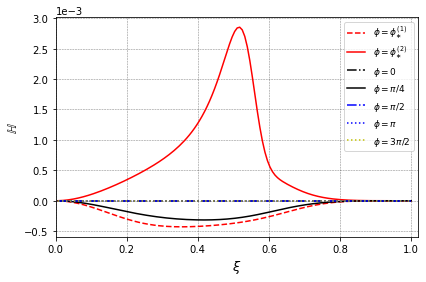

In [46]:
label_arr=['$\phi=\phi_{\\ast}^{(1)}$','$\phi=\phi_{\\ast}^{(2)}$','$\phi=0$','$\phi=\pi/4$','$\phi=\pi/2$','$\phi=\pi$','$\phi=3\pi/2$']
color_arr=['red','red','k','k','b','b','y']
styl_arr =['--','-','-.','-','-.',':',':']


fig=plt.figure() #figsize=(8, 6))
with plt . style . context ( [  'grid' ] ) : 

    for i in range(0,len(phi_arr)): 
        plt.plot(r_arr, Ham_Arr[i],styl_arr[i],color=color_arr[i],label=label_arr[i])

plt.xlabel(r"$\xi$", size=13)
plt.ylabel("$\mathbb{H}$", size=13)

plt.rc('font', size=9)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.xlim([0,1.02])


plt.legend(label_arr,loc='upper right',)


plt.tight_layout()
#plt.legend()
plt.show()
fig.savefig('errorHamV2.pdf')